In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.downloader import download
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.help import upenn_tagset
import re
import spacy
from pypdf import PdfReader
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
'''
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
'''

"\nnltk.download('punkt')\nnltk.download('stopwords')\nnltk.download('wordnet')\nnltk.download('averaged_perceptron_tagger')\n"

In [9]:
pdf = PdfReader(r'C:\work\PRM-Conceptual-Graphs-Recommendations\input\practice-standard-project-risk-management.pdf')

number_of_pages = len(pdf.pages)

print(f'Number of pages in the PMI book: {number_of_pages}')

Number of pages in the PMI book: 128


In [21]:
a = 0 
pmi_corpus= ""
for page_num in range(12, 123):  # Page numbering is 0-based
    page = pdf.pages[page_num]
    text = page.extract_text()
    print(f"Page {page_num + 1} Text:\n{text}\n")
    #print(f"{text}\n")
    pmi_corpus = pmi_corpus + text

    #words = text.split()

    # get number of words in total
    #a = a + len(words)

#print(pmi_corpus)

Page 13 Text:
1©2009 Project Management Institute. Practice Standard for Project Risk Management1
  CHAPTER 1 
 INTRODUCTION 
 Project Management Institute (PMI) practice standards are guides to the use of a tool, technique, or process 
identiﬁ  ed in  A Guide to the Project Management Body of Knowledge   ( PMBOK   ®  Guide  – Fourth Edition) or 
other PMI standards. Practice standards are targeted at audiences who participate in the management of 
projects. This includes project managers, project personnel, contract personnel, supervisors, and other project stakeholders. 
 A PMI practice standard describes processes, activities, inputs, and outputs for a speciﬁ  c Knowledge Area. 
It provides information on what the signiﬁ  cant process, tool, or technique is, what it does, why it is signiﬁ  cant, 
when it should be performed or executed, and, if necessary for further clariﬁ  cation, who should perform the process. A practice standard does not prescribe how the process is to be implem

In [17]:
pattern = r'\d+©2009 Project Management Institute\. Practice Standard for Project Risk Management1'
cleaned_text = re.sub(pattern, '', pmi_corpus)

In [19]:
print(cleaned_text)


  CHAPTER 1 
 INTRODUCTION 
 Project Management Institute (PMI) practice standards are guides to the use of a tool, technique, or process 
identiﬁ  ed in  A Guide to the Project Management Body of Knowledge   ( PMBOK   ®  Guide  – Fourth Edition) or 
other PMI standards. Practice standards are targeted at audiences who participate in the management of 
projects. This includes project managers, project personnel, contract personnel, supervisors, and other project stakeholders. 
 A PMI practice standard describes processes, activities, inputs, and outputs for a speciﬁ  c Knowledge Area. 
It provides information on what the signiﬁ  cant process, tool, or technique is, what it does, why it is signiﬁ  cant, 
when it should be performed or executed, and, if necessary for further clariﬁ  cation, who should perform the process. A practice standard does not prescribe how the process is to be implemented, leaving that subject for other forums such as handbooks, manuals, and courses. 
 This chap

In [3]:
text ="""
1©2009 Project Management Institute. Practice Standard for Project Risk Management1
CHAPTER 1 
INTRODUCTION 
Project Management Institute (PMI) practice standards are guides to the use of a tool, technique, or process 
identified in  A Guide to the Project Management Body of Knowledge   ( PMBOK   ®  Guide  – Fourth Edition) or 
other PMI standards. Practice standards are targeted at audiences who participate in the management of 
projects. This includes project managers, project personnel, contract personnel, supervisors, and other project stakeholders. 
A PMI practice standard describes processes, activities, inputs, and outputs for a speciﬁ  c Knowledge Area. 
It provides information on what the significant process, tool, or technique is, what it does, why it is signiﬁ  cant, 
when it should be performed or executed, and, if necessary for further clariﬁ  cation, who should perform the process. A practice standard does not prescribe how the process is to be implemented, leaving that subject for other forums such as handbooks, manuals, and courses. 
 This chapter includes the following sections: 
 1.1 Purpose of the Practice Standard for Project Risk Management 
 1.2 Project Risk Management Definition 
 1.3 Role of Project Risk Management in Project Management 
 1.4 Good Risk Management Practice  1.5 Critical Success Factors for Project Risk Management 

2©2009 Project Management Institute. Practice Standard for Project Risk Management1 CHAPTER 1 − INTRODUCTION
 1.1 Purpose of the Practice Standard for Project Risk Management 
 The purpose of the  Practice Standard for Project Risk Management   is to ( a  ) provide a standard for project 
management practitioners and other stakeholders that deﬁ  nes the aspects of Project Risk Management that 
are recognized as good practice on most projects most of the time and ( b  ) provide a standard that is globally 
applicable and consistently applied. This practice standard has a descriptive purpose rather than one used for training or educational purposes. 
 The  Practice Standard for Project Risk Management  covers risk management as it is applied to single 
projects only. Like the  PMBOK   
®  Guide  – Fourth Edition, this practice standard does not cover risk in programs 
or portfolios of projects. 
 Chapter 11 of the  PMBOK   ®  Guide –  Fourth Edition, is the basis for the  Practice Standard for Project Risk 
Management . This practice standard is consistent with that chapter, emphasizing the concepts and principles relating to Project Risk Management. It is aligned with other PMI practice standards. 
 Figure 1-1 compares the purposes of this practice standard to those of the  PMBOK   
®  Guide  – Fourth Edition 
and textbooks, handbooks, and courses. 
 Figure 1-1. Hierarchy of PMI Project Risk Management Resources 

3©2009 Project Management Institute. Practice Standard for Project Risk Management1 CHAPTER 1 − INTRODUCTION
 This practice standard is organized in three main sections: 
 1.  Introductory material including the framework, purpose, principles, context of, and introduction to 
Project Risk Management processes as deﬁ  ned in the  PMBOK   ®  Guide –  Fourth Edition. 
 2.  Principles underlying the six Project Risk Management processes in the  PMBOK   ®  Guide  – Fourth 
Edition. The six processes are as follows: 
 Plan Risk Management, • 
 Identify Risks, • 
 Perform Qualitative Risk Analysis, • 
 Perform Quantitative Risk Analysis, • 
 Plan Risk Responses, and • 
 Monitor and Control Risks. • 
 Each of these six processes is described in a chapter that addresses the following four topics: 
( a  ) purpose and objectives of the process; ( b  ) critical success factors for the process; ( c   ) tools and 
techniques for the process; and ( d    ) documenting the results of the process. 
 3. A glossary of terms which are used in this practice standard. 
 This practice standard emphasizes those principles that are fundamental to effective, comprehensive, 
and successful Project Risk Management. These principles can and should be stated at a general level for 
several reasons: 
 1.  Principles are expected to be agreed upon now and to be valid in the future. While tools and 
techniques are constantly evolving, the principles have more stability and persistence. 
 2.  Different projects, organizations, and situations will require different approaches to Project Risk 
Management. In particular, risk management is a discipline that contains a series of processes to 
apply to both large and small projects. Risk management will be more effective if its practice is 
tailored to the project and congruent with the organizational culture, processes and assets. There 
are many different ways of conducting risk management that may comply with the principles of Project Risk Management as presented in this practice standard. 
 3.  The principles are applicable to projects carried out in a global context, reﬂ  ecting the many 
business and organizational arrangements between participants, for example, joint ventures 
between commercial and national companies, government and non-government organizations, and the cross-cultural environment often found on these project teams. 
 The principles described herein can be used as a check for an organization’s processes. Practitioners can 
establish processes speciﬁ  c to their particular situation, project, or organization and then compare them with these principles, thus validating them against good Project Risk Management practice. 

"""

In [49]:
def preprocess_text(text):
    text = text.lower()
    # Removing special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Stopword removal
    stopwords_set = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stopwords_set]
    return filtered_tokens


In [57]:
clean_corpus = " " .join(e for e in preprocess_text(pmi_corpus))

In [58]:
print(clean_corpus)

12009 project management institute practice standard project risk management1 chapter 1 introduction project management institute pmi practice standards guides use tool technique process identi ed guide project management body knowledge pmbok guide fourth edition pmi standards practice standards targeted audiences participate management projects includes project managers project personnel contract personnel supervisors project stakeholders pmi practice standard describes processes activities inputs outputs speci c knowledge area provides information signi cant process tool technique signi cant performed executed necessary clari cation perform process practice standard prescribe process implemented leaving subject forums handbooks manuals courses chapter includes following sections 11 purpose practice standard project risk management 12 project risk management de nition 13 role project risk management project management 14 good risk management practice 15 critical success factors projec

In [53]:
# POS Tagging

pos_tag_mapping = {
    'CC': 'Coordinating conjunction',
    'CD': 'Cardinal number',
    'DT': 'Determiner',
    'EX': 'Existential there',
    'FW': 'Foreign word',
    'IN': 'Preposition or subordinating conjunction',
    'JJ': 'Adjective',
    'JJR': 'Adjective, comparative',
    'JJS': 'Adjective, superlative',
    'LS': 'List item marker',
    'MD': 'Modal',
    'NN': 'Noun, singular or mass',
    'NNS': 'Noun, plural',
    'NNP': 'Proper noun, singular',
    'NNPS': 'Proper noun, plural',
    'PDT': 'Predeterminer',
    'POS': 'Possessive ending',
    'PRP': 'Personal pronoun',
    'PRP$': 'Possessive pronoun',
    'RB': 'Adverb',
    'RBR': 'Adverb, comparative',
    'RBS': 'Adverb, superlative',
    'RP': 'Particle',
    'SYM': 'Symbol',
    'TO': 'to',
    'UH': 'Interjection',
    'VB': 'Verb, base form',
    'VBD': 'Verb, past tense',
    'VBG': 'Verb, gerund or present participle',
    'VBN': 'Verb, past participle',
    'VBP': 'Verb, non-3rd person singular present',
    'VBZ': 'Verb, 3rd person singular present',
    'WDT': 'Wh-determiner',
    'WP': 'Wh-pronoun',
    'WP$': 'Possessive wh-pronoun',
    'WRB': 'Wh-adverb'
}
tagged_tokens = pos_tag(pmi_corpus)

# Print tagged tokens
for token, pos_tag in tagged_tokens:
    full_pos_tag = pos_tag_mapping.get(pos_tag, pos_tag)
    print(f"{token} ({full_pos_tag})")

TypeError: 'str' object is not callable

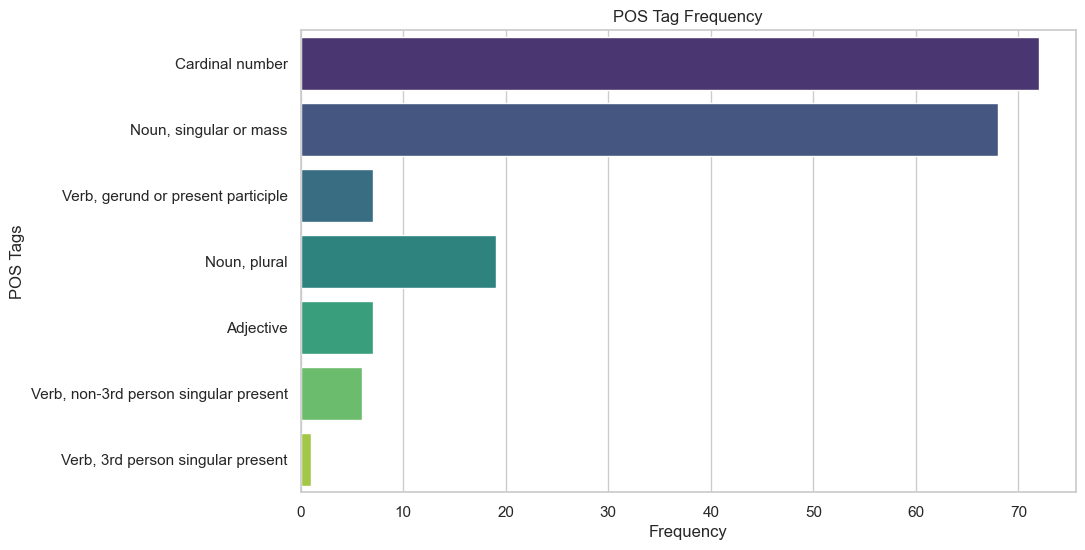

In [46]:
# Count the frequency of each POS tag
pos_tag_freq = defaultdict(int)
for token, pos_tag in tagged_tokens:
    pos_tag_freq[pos_tag] += 1

# Prepare data for plotting
pos_tags = [pos_tag_mapping.get(tag, tag) for tag in pos_tag_freq.keys()]
frequencies = list(pos_tag_freq.values())

# Set the plot style
sns.set(style="whitegrid")

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=frequencies, y=pos_tags, palette="viridis")

# Set the axis labels and title
plt.xlabel('Frequency')
plt.ylabel('POS Tags')
plt.title('POS Tag Frequency')

# Show the plot
plt.show()

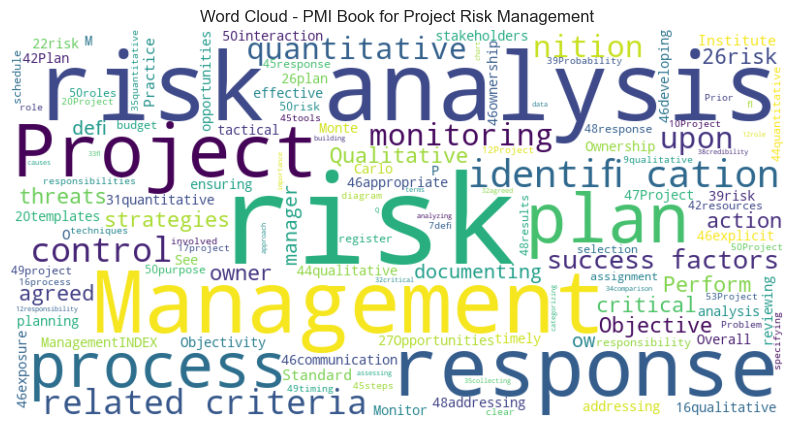

In [52]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - PMI Book for Project Risk Management')
plt.show()

In [8]:
filtered_tokens = preprocess_text(text)

In [13]:
filtered_tokens

['1162009',
 'project',
 'management',
 'institute',
 'practice',
 'standard',
 'project',
 'risk',
 'managementindex',
 'risk',
 'model',
 '3940',
 'risk',
 'monitoring',
 'control',
 'compliance',
 'tracking',
 '55',
 'contingency',
 'reserves',
 'managing',
 '5455',
 'critical',
 'success',
 'factors',
 '5354overall',
 'risk',
 'tracking',
 '55project',
 'monitoring',
 'control',
 'integrating',
 '53purpose',
 'objectives',
 '5152results',
 'documentation',
 '55risk',
 'awareness',
 'maintaining',
 '54schematic',
 'representation',
 '53tools',
 'techniques',
 '5455',
 'trigger',
 'conditions',
 '54',
 '55',
 'risk',
 'owner',
 'plan',
 'risk',
 'responses',
 '43',
 '49project',
 'risk',
 'management',
 '1516risk',
 'identi',
 'cation',
 '27',
 '29risk',
 'monitoring',
 'control',
 '51',
 '54',
 'risk',
 'prioritization',
 '34risk',
 'register',
 '23',
 '29',
 '35',
 '50',
 '52risk',
 'response',
 'strategies',
 '46',
 '47risk',
 'threshold',
 '14risks',
 'interrelationships',
 '40ri

In [10]:
#perform porter stemmer on an already tokenized list
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_words = [ps.stem(w) for w in filtered_tokens]
print(stemmed_words)


['1162009', 'project', 'manag', 'institut', 'practic', 'standard', 'project', 'risk', 'managementindex', 'risk', 'model', '3940', 'risk', 'monitor', 'control', 'complianc', 'track', '55', 'conting', 'reserv', 'manag', '5455', 'critic', 'success', 'factor', '5354overal', 'risk', 'track', '55project', 'monitor', 'control', 'integr', '53purpos', 'object', '5152result', 'document', '55risk', 'awar', 'maintain', '54schemat', 'represent', '53tool', 'techniqu', '5455', 'trigger', 'condit', '54', '55', 'risk', 'owner', 'plan', 'risk', 'respons', '43', '49project', 'risk', 'manag', '1516risk', 'identi', 'cation', '27', '29risk', 'monitor', 'control', '51', '54', 'risk', 'priorit', '34risk', 'regist', '23', '29', '35', '50', '52risk', 'respons', 'strategi', '46', '47risk', 'threshold', '14risk', 'interrelationship', '40risk', 'respons', 'interact', '4546role', 'respons', '45root', 'caus', '31', '35', '40', '45', 'schedul', '3742', '45', 'secondari', 'risk', '18', '43', '46', '48stakehold', 'comm

In [11]:
# Candidate Concept Identification
candidate_concepts = list(set(filtered_tokens))

# tf.idf Calculation
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform([" ".join(candidate_concepts)])  # Pass a list of candidate concepts
tfidf_scores = dict(zip(tfidf_vectorizer.get_feature_names_out(), tfidf_matrix.toarray()[0]))

# Rank and Select Concepts based on tf.idf scores
sorted_concepts = sorted(tfidf_scores.items(), key=lambda x: x[1], reverse=True)
selected_concepts = [concept for concept, score in sorted_concepts]

# Print the selected concepts and their tf.idf scores
for concept in selected_concepts:
    print(f"{concept}: {tfidf_scores[concept]:.4f}")

1011: 0.0962
1162009: 0.0962
13: 0.0962
14risks: 0.0962
1516risk: 0.0962
18: 0.0962
20: 0.0962
2023: 0.0962
2223risk: 0.0962
22risk: 0.0962
23: 0.0962
2528: 0.0962
27: 0.0962
2729risk: 0.0962
29: 0.0962
29risk: 0.0962
31: 0.0962
3335quantitative: 0.0962
34risk: 0.0962
35: 0.0962
3742: 0.0962
39: 0.0962
3940: 0.0962
40: 0.0962
4042risk: 0.0962
40risk: 0.0962
40risks: 0.0962
43: 0.0962
44: 0.0962
45: 0.0962
4546roles: 0.0962
45root: 0.0962
46: 0.0962
4647timing: 0.0962
4749: 0.0962
47risk: 0.0962
48: 0.0962
48stakeholder: 0.0962
49project: 0.0962
50: 0.0962
51: 0.0962
5152results: 0.0962
52risk: 0.0962
5354overall: 0.0962
53purpose: 0.0962
53tools: 0.0962
54: 0.0962
5455: 0.0962
54schematic: 0.0962
55: 0.0962
55project: 0.0962
55risk: 0.0962
910: 0.0962
analysis: 0.0962
attitude: 0.0962
awareness: 0.0962
cation: 0.0962
cause: 0.0962
communication: 0.0962
compliance: 0.0962
conditions: 0.0962
contingency: 0.0962
control: 0.0962
critical: 0.0962
data: 0.0962
documentation: 0.0962
factors: 